In [2]:
import numpy as np; 
import matplotlib.pyplot as plt;
import cv2;

---

## Bit Plane Slicing

In [79]:
## imshow function

def imshow(img, title=None):
    plt.imshow(img, 'gray');
    plt.title(title);
    plt.axis('off');
    plt.show();

### Background

In [68]:
# Finding the 8th bit value of a pixel value

pixel_value = 150;
bin_value = np.binary_repr(pixel_value, width=8);
bit8_value = int(bin_value[0]);

print(f"Example, pixel value is : ", pixel_value);
print(f"Binary value of {pixel_value} : ", bin_value, " Data type : ", type(bin_value));
print(f"8th bit value of {pixel_value} : ", bit8_value);

Example, pixel value is :  150
Binary value of 150 :  10010110  Data type :  <class 'str'>
8th bit value of 150 :  1


### A vectorized function to find the specific bit value for all pixels in the image

In [38]:
### Function to extract a specific bit-plane from a pixel's binary representation
def bitPlaneSlicing(img, bit_plane):
    bin_values = np.binary_repr(img, width=8);
    return int(bin_values[8-bit_plane]);

### Vectorize the bitPlaneSlicing function to apply it element-wise on an image array
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing);

### Example of Bit Plane Slicing on a Real Image

In [ ]:
img = cv2.imread(r"images\Fig0314(a)(100-dollars).tif", 0);
imshow(img, "Original Image");

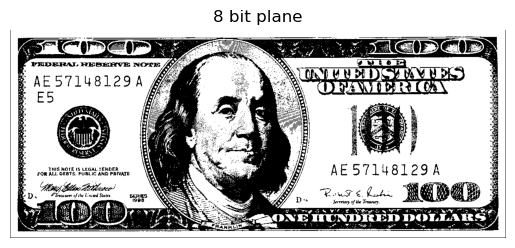

In [43]:
# 8th bit (most significant bit) plane

bit8_plane = bitPlaneSlicingVec(img, 8);
imshow(bit8_plane, "8 bit plane");

In [39]:
# bit planes of all bits

# bit8_plane = bitPlaneSlicingVec(img, 8)
bit7_plane = bitPlaneSlicingVec(img, 7)
bit6_plane = bitPlaneSlicingVec(img, 6)
bit5_plane = bitPlaneSlicingVec(img, 5)
bit4_plane = bitPlaneSlicingVec(img, 4)
bit3_plane = bitPlaneSlicingVec(img, 3)
bit2_plane = bitPlaneSlicingVec(img, 2)
bit1_plane = bitPlaneSlicingVec(img, 1)

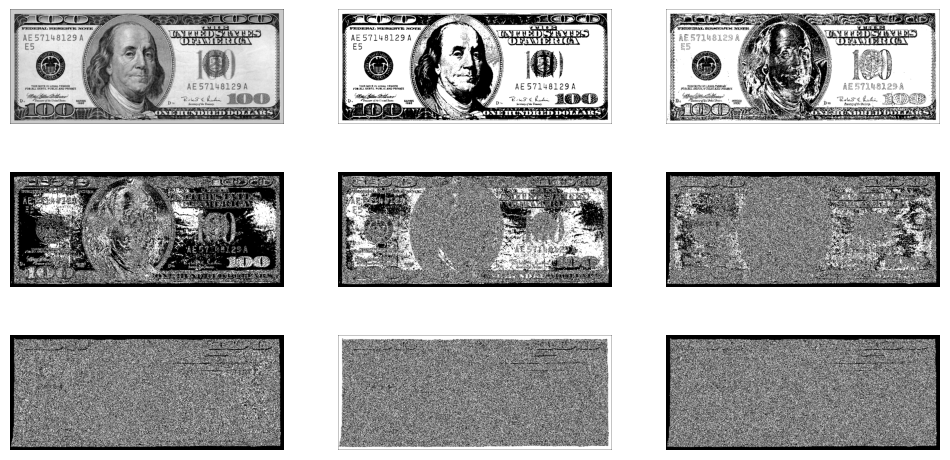

In [42]:
## Displaying All Images

fig, ax = plt.subplots(3,3, figsize=(12,6));
images = [img, bit8_plane, bit7_plane, bit6_plane, bit5_plane, bit4_plane, bit3_plane, bit2_plane, bit1_plane]

im = 0;
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(images[im], 'gray');
        ax[i,j].axis('off');
        im += 1;

----

## Histogram Processing
* A histogram in image processing is a graphical representation of the distribution of pixel intensities in an image.
* It shows the frequency of each intensity value in the image, where:
    * The x-axis represents the intensity levels.
    * The y-axis represents the number of pixels for each intensity.
* Histograms are widely used to analyze image contrast, brightness, and the overall intensity distribution, helping in tasks like image enhancement and thresholding.

### Example

In [2]:
# Create a 4x4 3-bit grayscale image (pixel values range from 0 to 7)
image = np.array([
    [0, 5, 2, 3],
    [4, 5, 6, 7],
    [5, 4, 2, 3],
    [4, 5, 6, 2]
])

In [56]:
## Defining the unique pixel intensity values and their corresponding frequencies
## unique_pixels: list of pixel intensity values (0-7)
## pixels_freq: corresponding frequency (number of occurrences) of each pixel intensity in the image

unique_pixels = [0, 1, 2, 3, 4, 5, 6, 7]
pixels_freq  =  [1, 0, 3, 2, 3, 4, 2, 1]

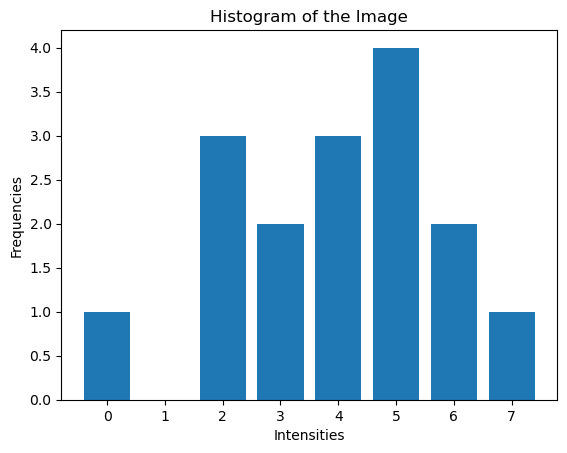

In [58]:
# Display the histogram

plt.bar(unique_pixels, pixels_freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of the Image");
plt.show();

### Histogram of a grayscale image

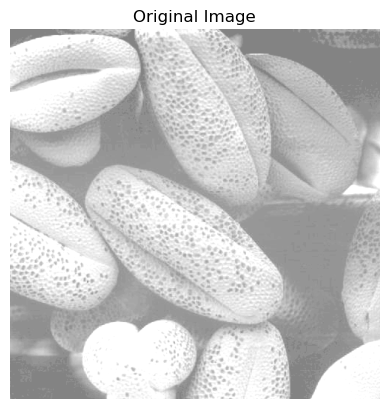

In [60]:
img = plt.imread(r"images\Fig0316(1)(top_left).tif");

plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title("Original Image");
plt.axis('off');
plt.show();

In [61]:
# Flattening the 2D image array into a 1D array
img_flatten = img.flatten()

# Assuming the image has pixel intensities ranging from 0 to 255
freq = np.zeros((256))

# Looping through each pixel value in the flattened image array
for i in img_flatten:
    # Incrementing the corresponding index in the 'freq' array based on the pixel intensity value 'i'
    freq[i] = freq[i] + 1

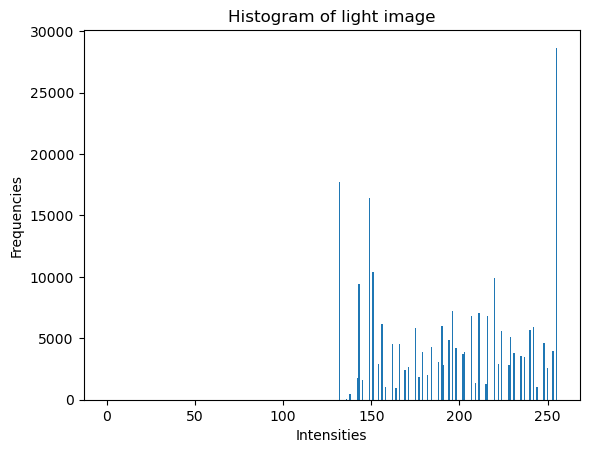

In [62]:
unique_pixels = np.arange(256);

plt.bar(unique_pixels, freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of light image");
plt.show();

### Histogram Normalization
$$ p(r_k) = \frac{h(r_k)}{MN} = \frac{n_k}{MN}    $$

* h(r<sub>k</sub>): Un-Normalized Histogram
* n<sub>k</sub>: Number of pixels in the image of size M x N with intensity 𝑟<sub>𝑘</sub>
* MxN : Total Number of Pixels in the image


In [63]:
img_flatten = img.flatten()
freq = np.zeros((256))
for i in img_flatten:
    freq[i] = freq[i] + 1

norm_freq = freq/len(img_flatten)

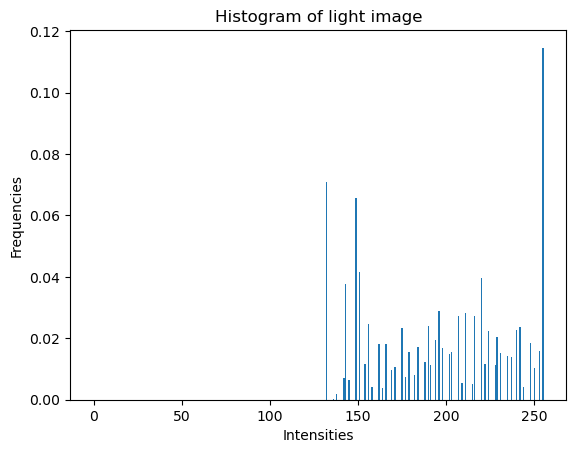

In [64]:
unique_pixels = np.arange(256);

plt.bar(unique_pixels, norm_freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of light image");
plt.show();

----

## Histogram Equalization

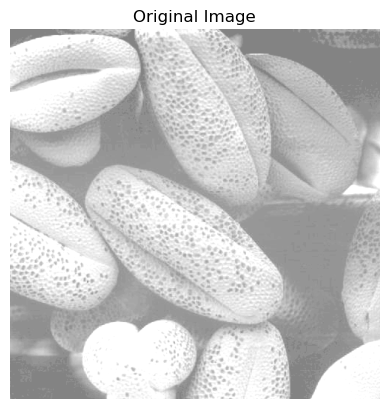

In [86]:
img = plt.imread(r"images\Fig0316(1)(top_left).tif");

plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title("Original Image");
plt.axis('off');
plt.show();

### Steps for Histogram Equalization

1. Compute the histogram of the image.

In [65]:
img_flatten = img.flatten()
freq = np.zeros((256))
for i in img_flatten:
    freq[i] = freq[i] + 1

2. Normalize the histogram to get the probability distribution.


In [66]:
pdf = freq/len(img_flatten);

3. Calculate the cumulative distribution function (CDF).

In [69]:
cdf = np.zeros_like(pdf);
for i in range(len(pdf)):
    cdf[i] = sum(pdf[:i+1])

4. Use the CDF to map the old pixel values to new ones for equalized distribution.

In [70]:
equalized_img = np.zeros_like(img);

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equalized_img[i,j] = cdf[img[i,j]]*255

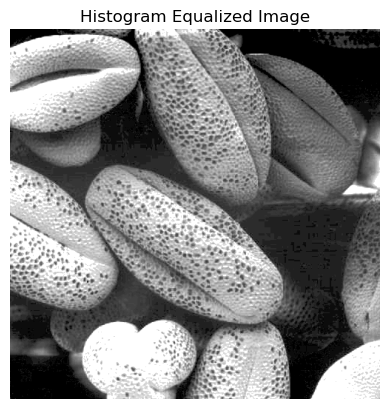

In [74]:
### Display the Histogram Equalized Image

plt.imshow(equalized_img, 'gray');
plt.title("Histogram Equalized Image");
plt.axis('off');
plt.show();

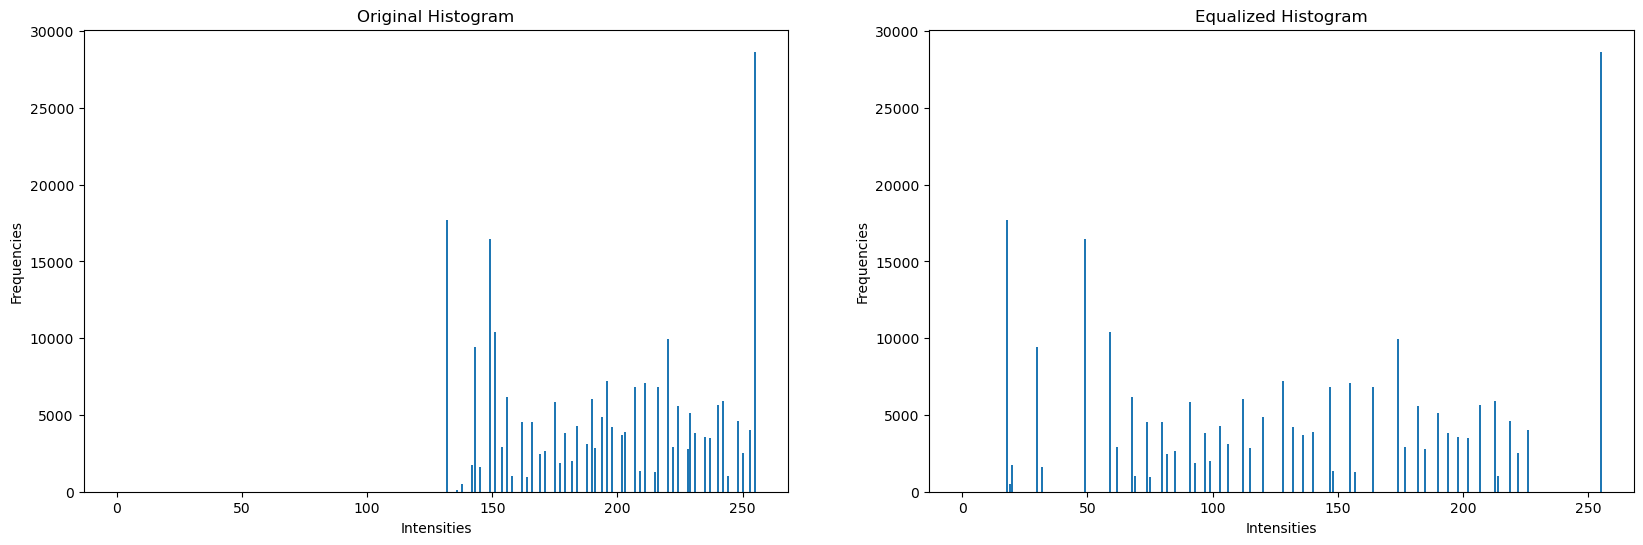

In [96]:
## Show Equalized Histogram

fig = plt.figure(figsize=(20,6));

plt.subplot(1,2,1);
plt.bar(np.arange(256), freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Original Histogram");

plt.subplot(1,2,2);
plt.bar(np.round(cdf*255), freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Equalized Histogram");
plt.show();

----

### Understanding the Limitations of Histogram Equalization

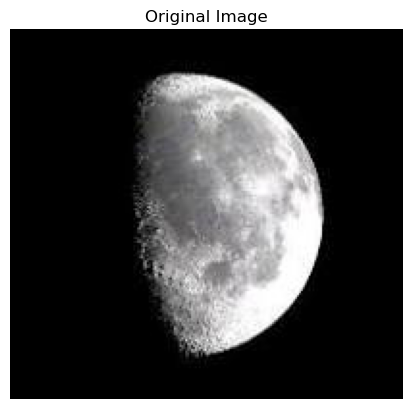

In [17]:
img = plt.imread(r"images\moon.jpeg");

plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title("Original Image");
plt.axis('off');
plt.show();

* The histogram of the above image is not equalized. Let's first visualize the histogram and then apply the histogram equalization process.

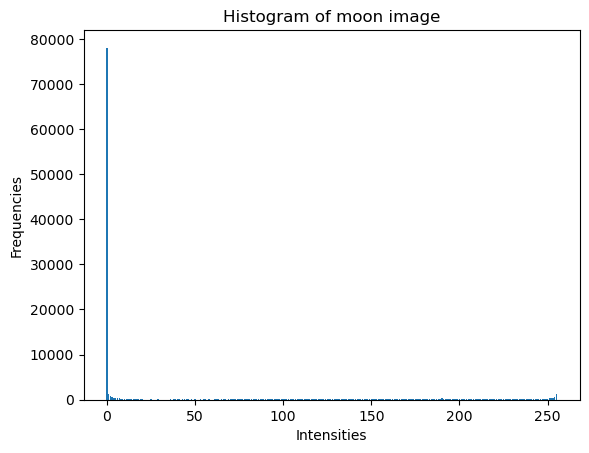

In [18]:
## Compute the histogram of the image

img_flatten = img.flatten()
freq = np.zeros((256))
for i in img_flatten:
    freq[i] = freq[i] + 1

unique_pixels = np.arange(256);

plt.bar(unique_pixels, freq);
plt.xlabel('Intensities');
plt.ylabel('Frequencies');
plt.title("Histogram of moon image");
plt.show();

In [23]:
# Normalize the histogram to get the probability distribution
pdf = freq/len(img_flatten);

In [24]:
# Calculate the cumulative distribution function (CDF)

cdf = np.zeros_like(pdf);
for i in range(len(pdf)):
    cdf[i] = sum(pdf[:i+1])

In [25]:
# Use the CDF to map the old pixel values to new ones for equalized distribution

equalized_img = np.zeros_like(img);

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        equalized_img[i,j] = cdf[img[i,j]]*255

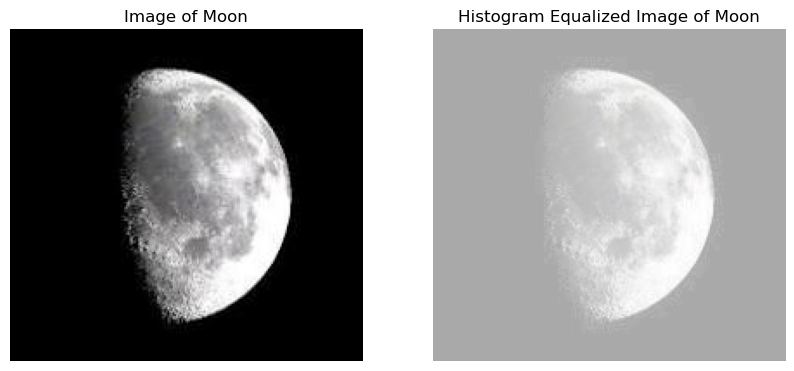

In [28]:
### Display Original image and Histogram Equalized Image

fig, axs = plt.subplots(1,2, figsize=(10,10));

axs[0].imshow(img, 'gray');
axs[0].set_title("Image of Moon");
axs[0].axis('off');
axs[1].imshow(equalized_img, 'gray');
axs[1].set_title("Histogram Equalized Image of Moon");
axs[1].axis('off');
plt.show();

### Conclusion
* We observed that the quality of the histogram-equalized image degraded instead of improving.
* Histogram equalization is not always the best option for all types of images, especially those with already balanced or specific lighting conditions.

----